# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.1.0-rc1'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
#### Add your code here ####
import os
os.chdir('/content/drive/My Drive/CV/')

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [13]:
#### Add your code here ####
project_path = "/content/drive/My Drive/CV/"
images_path = project_path + 'Aligned Face Dataset.zip'
print(images_path)
import zipfile
archive = zipfile.ZipFile(images_path, 'r')
archive.extractall()

/content/drive/My Drive/CV/Aligned Face Dataset.zip


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

In [0]:
#### Add your code here ####
img_path = metadata[0].image_path()
img = load_image(img_path)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()

model.load_weights('vgg_face_weights.h5', by_name=True)

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [20]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img/255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
#### Add your code here ####
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    if img is None:
      embeddings[i] = [0]*2622
    else:
      img = (img / 255.).astype(np.float32) 
      img = cv2.resize(img, dsize = (224,224))
      embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

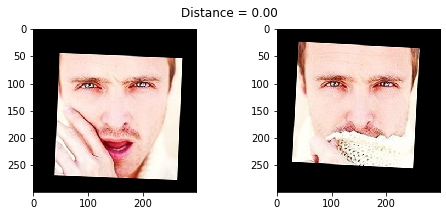

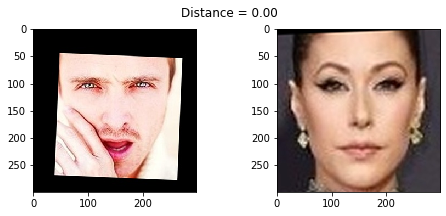

In [23]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####

In [80]:
embeddings

array([[-4.58881608e-04, -3.74088559e-05, -4.41366836e-04, ...,
        -1.20336597e-04, -1.74508295e-05,  1.15506220e-04],
       [-7.03605067e-04,  9.55563592e-05, -7.65581673e-04, ...,
        -2.49264005e-04,  2.02354553e-04,  1.12834365e-04],
       [-6.41516875e-04,  5.90202471e-05, -6.65419968e-04, ...,
        -2.03242729e-04,  2.01674673e-04,  9.38644080e-05],
       ...,
       [-4.02006757e-04, -6.54839969e-05, -3.87499924e-04, ...,
        -8.62574816e-05,  2.68998883e-05,  5.79038133e-05],
       [-4.07428481e-04, -1.18257427e-04, -3.98175966e-04, ...,
        -1.15080715e-04,  3.09982852e-06,  8.73738391e-05],
       [-3.64955951e-04, -6.70697482e-05, -3.99760756e-04, ...,
        -7.44393183e-05,  3.88103035e-05,  2.60191937e-05]])

In [0]:
x_train = embeddings[train_idx]
x_test = embeddings[test_idx]

In [82]:
x_train[0].shape

(2622,)

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####

In [0]:
targets = np.array([m.name for m in metadata])
encoder = LabelEncoder()
encoder.fit(targets)

y = encoder.transform(targets)

y_train = y[train_idx]
y_test = y[test_idx]

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####

In [0]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA

#### Add your code here ####

In [41]:
cov_matrix = np.cov(x_train_sc.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[ :, i]) for i in range(len(eigen_vals))]
tot = sum(eigen_vals)
explained_variance = [( i /tot ) * 100 for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(explained_variance)
print("Cumulative Variance Explained : ", cum_var_exp)



Cumulative Variance Explained :  [ 28.96333275  41.25088573  51.52162248 ...  99.99999318  99.99999662
 100.        ]


In [66]:
cum_var_exp[500]

96.1318297103043

In [67]:
pca=PCA(n_components=500) 
pca.fit(x_train_sc) 
x_train_pca=pca.fit_transform(x_train_sc)
x_test_pca=pca.transform(x_test_sc)

print("Principal components :", pca.n_components_)

Principal components : 500


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import SVC

#### Add your code here ####

In [70]:
svc = SVC(kernel='rbf')
svc.fit(x_train_pca, y_train)

from sklearn.metrics import f1_score, accuracy_score
y_pred = svc.predict(x_test_pca)
acc_score = accuracy_score(y_test, y_pred)
f1_score = accuracy_score(y_test, y_pred)
print('accuracy', acc_score *100)
print('F1', f1_score*100)

accuracy 16.290726817042607
F1 16.290726817042607


### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())


In [0]:
example_image = (example_image/255.).astype(np.float32)
example_image = cv2.resize(example_image, dsize = (224,224))
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(example_image, axis=0))[0]

In [83]:
embedding_vector.shape

(2622,)

In [0]:
ex_img = embedding_vector.reshape(1,-1)

In [0]:
ex_img = scaler.transform(ex_img)


In [0]:
ex_img_pca=pca.transform(ex_img)

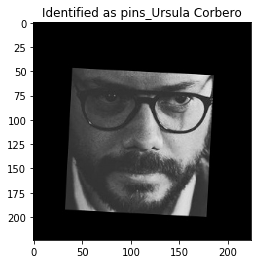

In [92]:
example_prediction = svc.predict(ex_img_pca)
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');